In this notebook, we'll demonstrate `agex` integration with vision-capable models.

We will give an agent access to the **Pillow (PIL)** library and ask it to perform an image manipulation task. This example highlights two core `agex` principles:

1.  **Direct Library Integration:** The agent will use the real `Pillow` library, not a simplified wrapper tool.
2.  **Runtime Interoperability:** The agent will receive and return actual `PIL.Image` objects, which we can use immediately in our code.

We'll use GPT-5 for this task, as it has strong vision capabilities.

In [ ]:
import io
import PIL
from IPython.display import display, Image as IPImage

from PIL.Image import Image, open as pil_open

from agex import Agent
from agex.llm import connect_llm

# create an agent configured with a vision-capable llm
vizzy = Agent(
    name="vizzy",
    primer="You are an expert at image manipulation.",
    llm_client=connect_llm(provider="openai", model="gpt-5"),
)

# give the agent access to the Pillow library
vizzy.module(PIL, recursive=True, visibility="low")

First, let's load the image we'll be working with. It's a photo of a homemade Halloween decoration.

We'll display a thumbnail to see what the agent will be starting with.

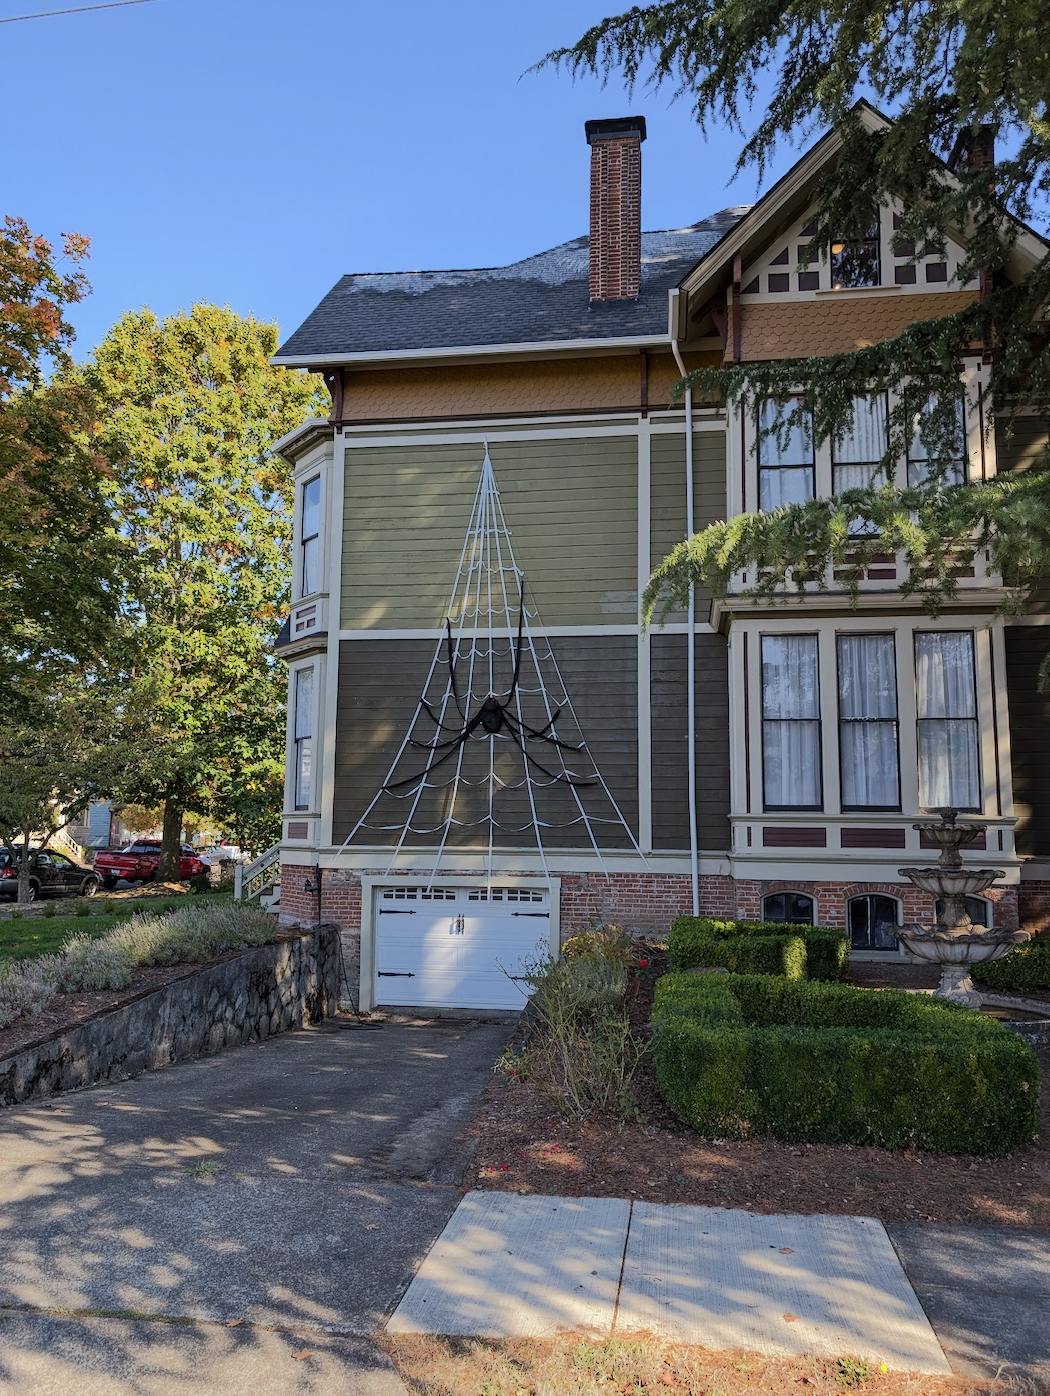

In [2]:
spider = pil_open("examples/spider.png")

# let's look at a thumbnail of the image
buffer = io.BytesIO()
spider.save(buffer, format='PNG')
display(IPImage(data=buffer.getvalue(), width=480))


Next, we'll define the task for our agent. The signature is straightforward: it takes a text `prompt` and a `PIL.Image` object, and it returns a new `PIL.Image` object.

We'll also introduce the `@task(setup=...)` parameter. This is a handy feature for efficiency. The `setup` string provides code that runs in the agent's sandbox *before* the main reasoning loop begins.

By using `setup="view_image(inputs.image)"`, we instruct the agent to immediately view the image it receives. This gives it the visual context it needs from the very start, saving an entire LLM turn that would otherwise be spent just deciding to inspect the input.

In [3]:
# define a task and use setup to automatically have the agent view the image
@vizzy.task(setup="view_image(inputs.image)")
def process_image(prompt: str, image: Image) -> Image:  # type: ignore[return-value]
    """Process an image based on a prompt and return the new image object."""
    pass

Now, let's kick off our task. We'll ask the agent to crop the image to focus on the spider and its web. The agent will receive our prompt and the `spider` image object.

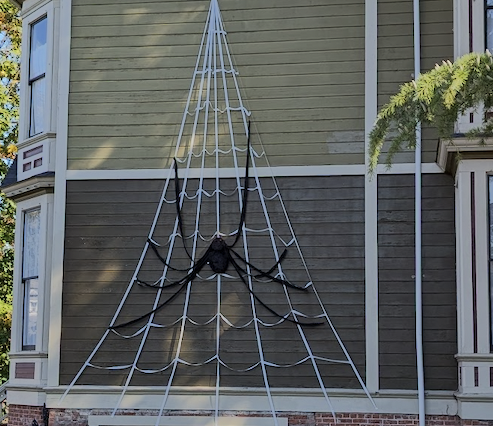

In [4]:
cropped = process_image("Crop to show just the spider & web", spider)
display(cropped)

Success! The agent correctly interpreted the prompt, analyzed the image it "viewed" in the setup step, and used its knowledge of the Pillow library to perform the crop.

The agents often don't get the crop right on the first try but will notice and self-correct after reviewing their crop with `view_image`. The ability to inspect images is a primitive we provide the agents by default whenever they work with image-oriented types. This is handy not just for photos but also for plots and data visualizations.

